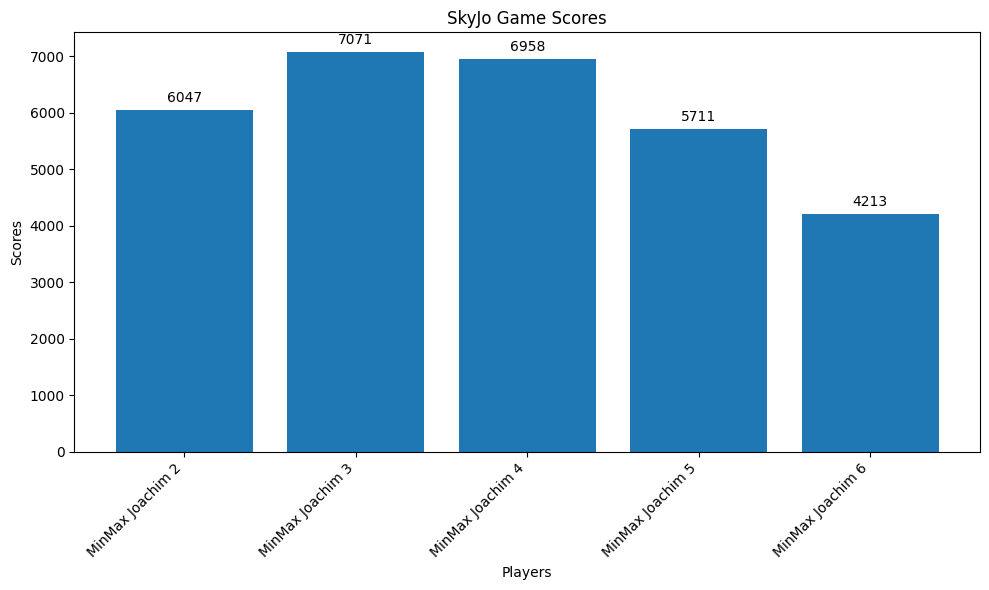

In [6]:
#!/usr/bin/env python3
from skyjo_game import SkyJoGame
from players.random_player import RandomPlayer
from players.min_max_player import MinMaxPlayer
import matplotlib.pyplot as plt
import concurrent.futures

players = [
    # RandomPlayer("Random Jürgen"),
    # MinMaxPlayer("MinMax Joachim 1", {"take_threshold": 1}),
    MinMaxPlayer("MinMax Joachim 2", {"take_threshold": 2}),
    MinMaxPlayer("MinMax Joachim 3", {"take_threshold": 3}),
    MinMaxPlayer("MinMax Joachim 4", {"take_threshold": 4}),
    # MinMaxPlayer("MinMax Joachim 5", {"take_threshold": 5}),
    # MinMaxPlayer("MinMax Joachim 6", {"take_threshold": 6}),
    # MinMaxPlayer("MinMax Joachim 7", {"take_threshold": 7}),
    # MinMaxPlayer("MinMax Joachim 8", {"take_threshold": 8}),
    # CustomPlayer("CustomPlayer"), # Add your player here
]

scores = {player.id: 0 for player in players}
for i in range(200):
    game = SkyJoGame(players)
    winner = game.play_game()
    scores[winner] += 1

# Assuming SkyJoGame and players are defined elsewhere
def play_single_game(players):
    game = SkyJoGame(players)
    winner = game.play_game()
    return winner


def parallelized_game_play(players, num_games=30000):
    scores = {player.id: 0 for player in players}

    # Create a pool of worker processes
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Run the games in parallel
        futures = [executor.submit(play_single_game, players) for _ in range(num_games)]

        # Collect the results as they complete
        for future in concurrent.futures.as_completed(futures):
            winner = future.result()
            scores[winner] += 1

    return scores


# Run the parallelized game simulation
scores = parallelized_game_play(players)


# Sort the players by name
sorted_scores = dict(sorted(scores.items()))

# Separate the dictionary into keys (player names) and values (scores)
players = list(sorted_scores.keys())
player_scores = list(sorted_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
plt.bar(players, player_scores)

# Add labels and title
plt.xlabel("Players")
plt.ylabel("Scores")
plt.title("SkyJo Game Scores")

# Rotate the x-axis labels if necessary for readability
plt.xticks(rotation=45, ha="right")

# Display the values on top of the bars
for i, score in enumerate(player_scores):
    plt.text(i, score + (max(player_scores) / 50), str(score), ha="center")

# Show the graph
plt.tight_layout()
plt.show()

AttributeError: 'str' object has no attribute 'id'

In [7]:
scores

{'MinMax Joachim 7': 1193,
 'MinMax Joachim 8': 1030,
 'MinMax Joachim 2': 1905,
 'MinMax Joachim 4': 2229,
 'MinMax Joachim 1': 1421,
 'MinMax Joachim 3': 2222}